In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [40]:
# Step 1: Load the AT&T face dataset
data = fetch_olivetti_faces()
X, y = data.data, data.target

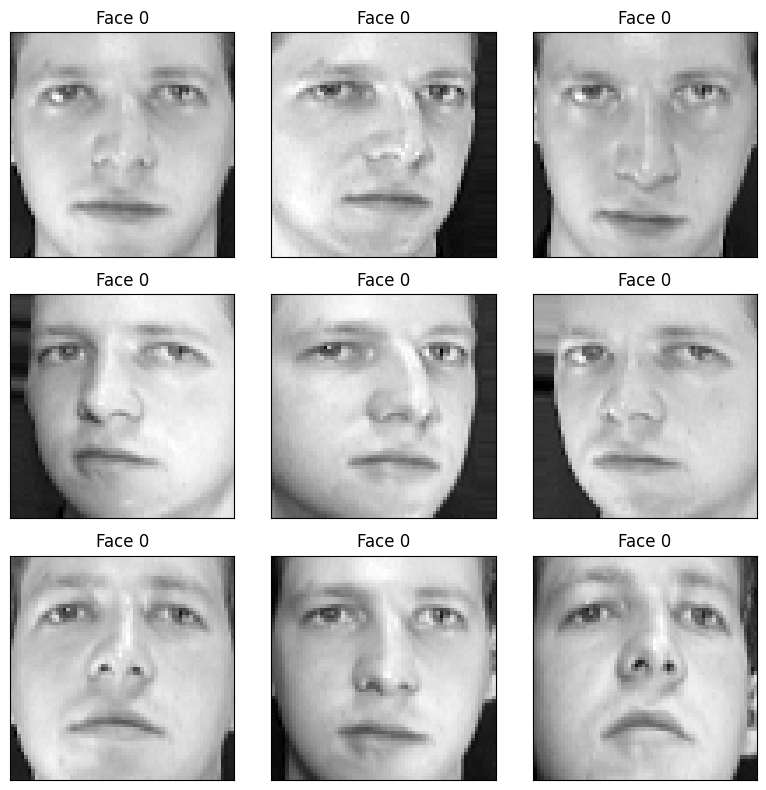

In [41]:
# Step 2: Visualize some sample faces
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(64, 64), cmap='gray')
    ax.set_xticks([]), ax.set_yticks([]), ax.set_title(f"Face {y[i]}")
plt.tight_layout()
plt.show()

In [42]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
# Step 4: Perform PCA to extract eigenfaces
n_components = 100
pca = PCA(n_components=n_components, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

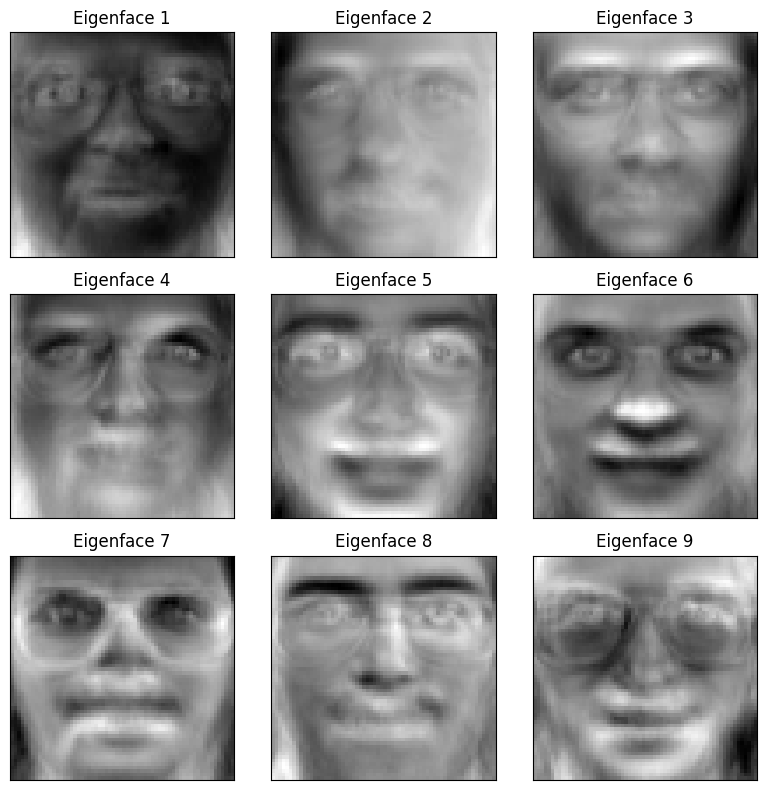

In [44]:
# Step 5: Visualize the top eigenfaces
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
    ax.set_xticks([]), ax.set_yticks([]), ax.set_title(f"Eigenface {i+1}")
plt.tight_layout()
plt.show()

In [45]:
# Step 6: Train a KNN classifier on the PCA-transformed data
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [46]:
# Step 7: Test the face recognition system on new faces
y_pred = knn.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Face recognition accuracy: {accuracy:.2f}")

Face recognition accuracy: 0.72


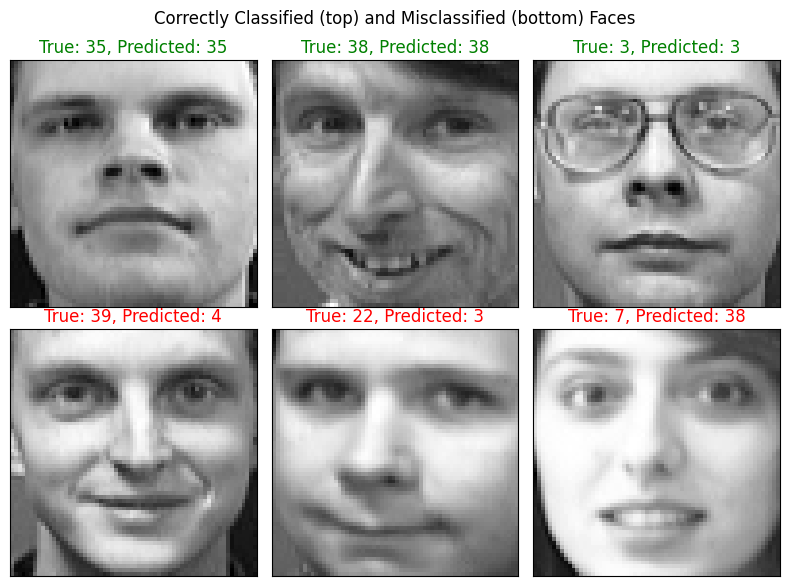

In [48]:
# Step 8: Visualize some correctly classified and misclassified faces
fig, axes = plt.subplots(2, 3, figsize=(8, 6))
for i, ax in enumerate(axes.flat):
    idx = np.random.choice(np.where(y_test == y_pred)[0]) if i < 3 else np.random.choice(np.where(y_test != y_pred)[0])
    ax.imshow(X_test[idx].reshape(64, 64), cmap='gray')
    ax.set_title(f"True: {y_test[idx]}, Predicted: {y_pred[idx]}", color='g' if y_test[idx] == y_pred[idx] else 'r')
    ax.set_xticks([]), ax.set_yticks([])
plt.suptitle("Correctly Classified (top) and Misclassified (bottom) Faces")
plt.tight_layout()
plt.show()